In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import PIL
import os
import time
x_train = np.load("D:\ML\DCGAN_LSUN\input\church_outdoor_train_lmdb_color_64.npy")#Your dir
print("Data loaded : ", x_train.shape)
x_train = (x_train-127.5)/127.5
print("Data preprocessed")

#LSUN church dataset 126227

Data loaded :  (126227, 64, 64, 3)
Data preprocessed


In [8]:


def save_img(img_list, epoch):
    n = 0
    dir = "D:\\ML\\DCGAN_LSUN\\epoch" + str(epoch) #Your dir
    os.makedirs(dir, exist_ok=True)
    for x in img_list:
        img = x*127.5+127.5
        img = img.astype(np.uint8)

        plt.imsave(dir+"\\"+str(n)+".jpg", arr=img)

        n+=1
def x_resize(x,output_size):
    img_list = [PIL.Image.fromarray(t) for t in x]
    img_list = [np.asarray(t.resize((output_size, output_size))) for t in img_list]
    img_list = np.asarray(img_list).astype(np.float32)
    return img_list

        
def make_G():
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Dense(4*4*1024, input_shape=(100,), kernel_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.02, seed=None)))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.ReLU())
    
    model.add(tf.keras.layers.Reshape((4,4,1024)))
    
    model.add(tf.keras.layers.Conv2DTranspose(filters=512, kernel_size=5, strides=2, padding="same", kernel_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.02, seed=None)))
    assert model.output_shape == (None, 8, 8, 512), "Expected shape is {0}, but {1}.".format((None,8,8,512), model.output_shape)
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.ReLU())
    
  
    model.add(tf.keras.layers.Conv2DTranspose(filters=256, kernel_size=5, strides=2, padding="same", kernel_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.02, seed=None)))
    assert model.output_shape == (None, 16, 16, 256), "Expected shape is {0}, but {1}.".format((None,16,16,256), model.output_shape)
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.ReLU())
    
    model.add(tf.keras.layers.Conv2DTranspose(filters=128, kernel_size=5, strides=2, padding="same", kernel_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.02, seed=None)))
    assert model.output_shape == (None, 32, 32, 128), "Expected shape is {0}, but {1}.".format((None,32,32,128), model.output_shape)
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.ReLU())
    
    model.add(tf.keras.layers.Conv2DTranspose(filters=3, kernel_size=5, strides=2, padding="same", activation="tanh", kernel_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.02, seed=None)))
    
    return model
def make_D():
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=5, strides=2, padding='same', input_shape=(64, 64, 3), kernel_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.02, seed=None)))
    assert model.output_shape == (None, 32, 32, 64), "Expected shape is {0}, but {1}.".format((None,32,32,64), model.output_shape)          
    model.add(tf.keras.layers.LeakyReLU(alpha=0.2))
    
    model.add(tf.keras.layers.Conv2D(filters=128, kernel_size=5, strides=2, padding='same', kernel_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.02, seed=None)))
    assert model.output_shape == (None, 16, 16, 128), "Expected shape is {0}, but {1}.".format((None,16,16,128), model.output_shape)
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.LeakyReLU(alpha=0.2))
              
    model.add(tf.keras.layers.Conv2D(filters=256, kernel_size=5, strides=2, padding='same', kernel_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.02, seed=None)))
    assert model.output_shape == (None, 8, 8, 256), "Expected shape is {0}, but {1}.".format((None,8,8,256), model.output_shape)          
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.LeakyReLU(alpha=0.2))

    model.add(tf.keras.layers.Conv2D(filters=512, kernel_size=5, strides=2, padding='same', kernel_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.02, seed=None)))
    assert model.output_shape == (None, 4, 4, 512), "Expected shape is {0}, but {1}.".format((None,4,4,512), model.output_shape)          
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.LeakyReLU(alpha=0.2))
    
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(1, input_shape=(4*4*512,)))
    
    return model

              

save_img(x_train[:2], 1)
G = make_G()
D = make_D()

batch_size = 128
batch_num = int(x_train.shape[0]/batch_size)

learning_rate = 0.0002

print("Start Training")



Start Training


In [9]:
s_time = time.time()

for epoch in range(50+1):
    d_loss_m, g_loss_m = 0,0
    for batch in range(batch_num):
        X = x_train[batch*batch_size:(batch+1)*batch_size]
        z = np.random.randn(batch_size,100)
        z = z.astype(np.float32)
        with tf.GradientTape() as d_tape, tf.GradientTape() as g_tape:    
            G_z = G(z)
    
            D_X = D(X)
            D_Gz = D(G_z)
        
  
            cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)
            real_loss = cross_entropy(tf.ones_like(D_X), D_X)
            fake_loss = cross_entropy(tf.zeros_like(D_Gz), D_Gz)
            d_loss = real_loss + fake_loss
            g_loss = cross_entropy(tf.ones_like(D_Gz), D_Gz)
            
            if batch%10==0: print(epoch, batch, "/", batch_num, tf.reduce_mean(tf.nn.sigmoid(D_X)).numpy(), tf.reduce_mean(tf.nn.sigmoid(D_Gz)).numpy())
    
        d_grad = d_tape.gradient(d_loss,D.trainable_variables)
        g_grad = g_tape.gradient(g_loss,G.trainable_variables)
        d_optimizer = tf.optimizers.Adam(beta_1 = 0.5, learning_rate = learning_rate)
        d_optimizer.apply_gradients(grads_and_vars=zip(d_grad, D.trainable_variables))
        
        g_optimizer = tf.optimizers.Adam(beta_1 = 0.5, learning_rate = learning_rate)
        g_optimizer.apply_gradients(grads_and_vars=zip(g_grad, G.trainable_variables))
        
        d_loss_m  += d_loss/batch_num
        g_loss_m  += g_loss/batch_num
    print(epoch, d_loss_m.numpy(), g_loss_m.numpy(), "------------------------------")
    z = np.random.randn(10,100)
    img = G(z, training=False).numpy()
    if epoch==0: print("time per epoch:", time.time() - s_time)
    if epoch%1==0: save_img(img, epoch)
t = time.time() - s_time
print("TIME::",t)


0 0 / 986 0.4987929 0.50012445
0 10 / 986 0.86055166 0.20555846
0 20 / 986 0.7508134 0.13611867
0 30 / 986 0.7773497 0.38505322
0 40 / 986 0.9589956 0.2563829
0 50 / 986 0.98522496 0.08564024
0 60 / 986 0.94757 0.0149251595
0 70 / 986 0.9999512 0.9993669
0 80 / 986 0.91693735 0.09713942
0 90 / 986 0.99995154 0.95053804
0 100 / 986 0.9999169 0.9982251
0 110 / 986 0.8119732 4.516227e-12
0 120 / 986 0.99962854 0.99997646
0 130 / 986 0.16447699 0.012178253
0 140 / 986 0.8581376 0.009291701
0 150 / 986 0.9998572 0.95911384
0 160 / 986 0.99664086 1.889689e-08
0 170 / 986 0.9619856 0.25879645
0 180 / 986 0.7903976 0.06063196
0 190 / 986 0.9999875 0.9999176
0 200 / 986 0.97004426 0.99623734
0 210 / 986 0.933972 1.4892354e-05
0 220 / 986 0.95616025 0.000115936244
0 230 / 986 0.8243228 0.80735743
0 240 / 986 0.7728986 0.43746912
0 250 / 986 0.970822 0.98994935
0 260 / 986 0.90928376 0.017369993
0 270 / 986 0.9890825 0.9427163
0 280 / 986 0.8853492 0.0008379057
0 290 / 986 0.92310965 0.19091731
0

KeyboardInterrupt: 

In [62]:
z = np.random.randn(10,100)
j=1

2.90484622325951


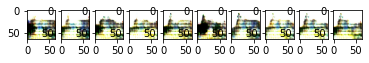

In [80]:
z = z+0.5
j+=1
print(z[0][0])
img = G(z, training=False).numpy()
save_img(img, 100+j)
img = img*127.5 + 127.5
img = img.astype(np.int)



#plt.imshow(img[0])

fig = plt.figure()
rows = 1
cols = 10
i = 1
for img_x in img:
    ax = fig.add_subplot(rows, cols, i)
    ax.imshow(img_x)
    i+=1
   #walking in the latent space
#Run this cell multiple times to see the result

In [64]:
checkpoint_dir = "D:\\ML\\DCGAN_mnist\\checkpoints"
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt")
checkpoint = tf.train.Checkpoint(g_optimizerr=g_optimizer,
                                 d_optimizer=d_optimizer,
                                 G=G,
                                 D=D)